<a href="https://colab.research.google.com/github/existen234/cnn_proj_mnist/blob/main/Report_CNN_MNIST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Using CNN: A Case Study on the MNIST Dataset




Three Convolutional Neural Network(CNN) is studied in this report with the use of MNIST dataset , which is a dataset for handwritten digit (0 to 9). In my initial project proposal, I attempted to do object detection with a drone, but given the constraint of time and the work will take, I have relocated the project of interest into similar field of computer vision. MNIST dataset is easy to import and a standardized dataset. Therefore, it is an ideal dataset for me as beginner to land on the computer vision field.

The new hypothesis of my project is to be building CNN models from MNIST and studying effect of some hyperparameters tuning in the CNN architecture and training process. The CNN architectures employed in this report start with the most standard one, using ReLU in hidden layers and softmax in the fully connected layers. Then, the second model would use tanh as activation function in the hidden layers. Lastly, the third model, I would append drop out layer on top of the first model. Initially, I expected most accurate evaluation on the third model since fitting problem is promised to be addressed with the help of dropout layer. Nevertheless, the first model with the most stardard and popular architecture, has the best evaluation performance on my custom dataset(after I appended my custom dataset into MNIST dataset and trained the model together), which implies that the first model generalises better predictions when unseen records is fed in.

Link to github repository: https://github.com/existen234/cnn_proj_mnist.git

Link to Youtube: https://www.youtube.com/watch?v=arvE7h_-22Y



# Data Source and Preprocessing

In [101]:
import numpy as np
import pandas as pd
import keras
from keras. utils import np_utils
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

In [102]:
# import mnist dataset 
(X_train, y_train), (X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [103]:
# normalize X
X_train=X_train/255
X_test=X_test/255

# append color dimenstion
X_train4D=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test4D=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

# onehot encoding on the category
y_trainOneHot=np_utils.to_categorical(y_train)
y_testOneHot=np_utils.to_categorical(y_test)


ReLU is the most popular chocie of activation function in the hidden layers as it speeds up the computation by taking only positive output in the convulutional operation (happen in Conv2D layer).
A possible replacement for the activation function in the hidden layer output would be tanh, which I would test later on the second model.

MaxPooling layer is a standard implementation in a CNN model, to decrease the data dimension and necessary computations but still capturing the features, which also differentiate a convolutional neural network(CNN) from an artificial neural network(ANN). The latter one fails to posistion invariant feature detection, while CNN model is more tolerant towards variation and distortion of input, such as shifting position from the center to the right. This is due to the combination of convolutional operation and max pooling operation in CNN.

In the training process, I used mini batch gradient descent as training method to make the computation more effieicent. Using batch gradient descent alone, without the parameter batch_size, would take longer time to train since the training sample size in this case is 60000. Compromising between computation power and performance of model, mini batch gradient would be an ideal choice to train the models.


In [104]:
# model 1 with activation function ReLU in the hidden layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
model=keras.models.Sequential([
    Conv2D(filters =16, kernel_size=(5,5),padding='same', input_shape=(28,28,1),activation='relu'),
    MaxPooling2D(pool_size=(2,2)), 
    Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)), 
    Flatten(),
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x=X_train4D,
          y=y_trainOneHot,
          validation_split=0.2,
          epochs=5,batch_size=100)

Epoch 1/5
480/480 [==============================] - 5s 5ms/step - loss: 0.2235 - accuracy: 0.9316 - val_loss: 0.0825 - val_accuracy: 0.9768
Epoch 2/5
480/480 [==============================] - 2s 5ms/step - loss: 0.0607 - accuracy: 0.9815 - val_loss: 0.0538 - val_accuracy: 0.9851
Epoch 3/5
480/480 [==============================] - 2s 4ms/step - loss: 0.0420 - accuracy: 0.9871 - val_loss: 0.0467 - val_accuracy: 0.9861
Epoch 4/5
480/480 [==============================] - 2s 4ms/step - loss: 0.0308 - accuracy: 0.9906 - val_loss: 0.0496 - val_accuracy: 0.9862
Epoch 5/5
480/480 [==============================] - 2s 5ms/step - loss: 0.0261 - accuracy: 0.9913 - val_loss: 0.0432 - val_accuracy: 0.9859


# Evaluation Part 1


Evaluation for model 1

In [105]:
# Evaluation 
model.evaluate(X_test4D, y_testOneHot)

313/313 [==============================] - 1s 4ms/step - loss: 0.0374 - accuracy: 0.9889


[0.03738018497824669, 0.9889000058174133]

Very good accuaracy is achieved as expected as guarenteed by the complex architecture of CNN. Parameters shared through out different layers

In [106]:
model.predict(X_test4D)

313/313 [==============================] - 1s 2ms/step


array([[5.18830985e-12, 3.88793131e-09, 5.21994465e-08, ...,
        9.99998331e-01, 1.84722154e-10, 6.19192804e-07],
       [8.17175896e-06, 3.92461807e-05, 9.99952555e-01, ...,
        1.30955957e-09, 5.28455892e-08, 5.14010674e-11],
       [7.39151574e-07, 9.99621153e-01, 5.56375790e-06, ...,
        6.08347109e-05, 7.33925299e-06, 1.61432615e-06],
       ...,
       [4.49487224e-15, 8.53064019e-09, 1.71691203e-11, ...,
        4.70255870e-08, 1.35048817e-08, 1.26741284e-07],
       [5.63559652e-08, 4.75464890e-10, 4.15976767e-11, ...,
        2.03130912e-09, 4.94837877e-04, 9.99771501e-08],
       [7.25876453e-06, 8.15997566e-07, 7.29555609e-07, ...,
        7.36361443e-08, 1.48969575e-05, 1.91531711e-07]], dtype=float32)

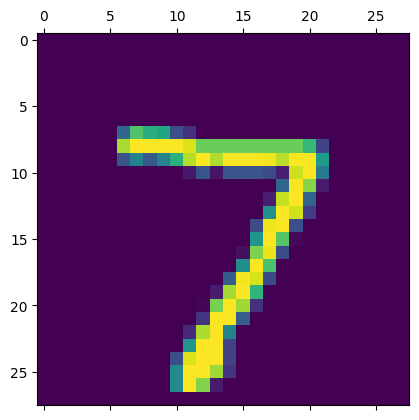

In [107]:
plt.matshow(X_test[0])  

In [108]:
y_predicted=model.predict(X_test4D)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([5.1883099e-12, 3.8879313e-09, 5.2199447e-08, 9.9176475e-07,
       4.5112859e-12, 1.4769390e-10, 6.3643520e-18, 9.9999833e-01,
       1.8472215e-10, 6.1919280e-07], dtype=float32)

In [109]:
# use numpy to print the maximum value 
np.argmax(y_predicted[0])

7

Therefore, the evaluation on the above testing set is correct.

In [110]:
# confusion matrix preparation

# the first five predicting labels from the model1
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [111]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [112]:
# build a confusion matrix
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    0,    1,    1,    5,    1,    2,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    4, 1013,    6,    1,    0,    1,    4,    2,    0],
       [   0,    0,    0, 1007,    0,    2,    0,    0,    1,    0],
       [   0,    0,    0,    0,  978,    0,    0,    1,    0,    3],
       [   1,    0,    0,   13,    0,  876,    1,    0,    0,    1],
       [   1,    2,    0,    1,    3,    2,  948,    1,    0,    0],
       [   0,    2,    1,    5,    0,    0,    0, 1018,    1,    1],
       [   1,    0,    2,    9,    0,    2,    1,    2,  952,    5],
       [   0,    2,    0,    2,    8,    3,    0,    1,    1,  992]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

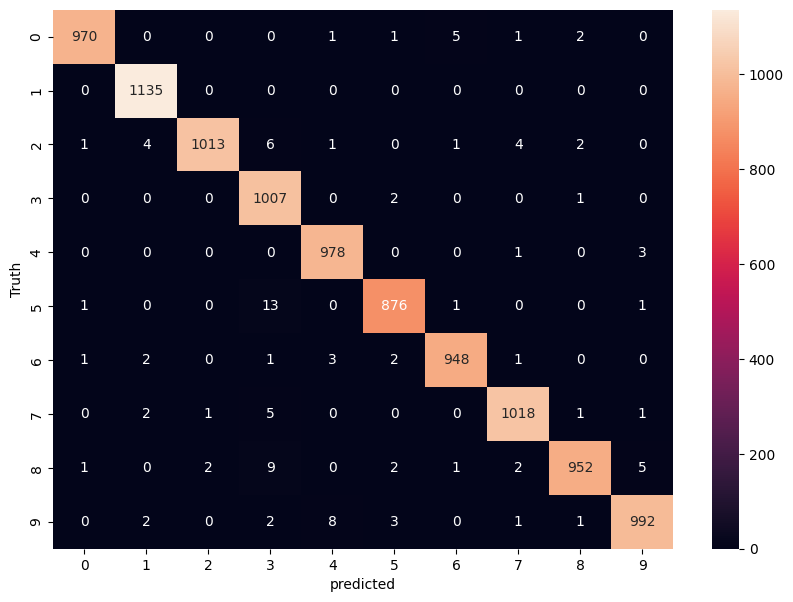

In [113]:
# visulaize the cm 
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

The diagonal of confusion matrix illustrate how many correct prediction is delivered by the model. Since the rest of matrix apart from the diagonal is black with the help of seabron library, the model has little wrong prediction. And the following is going to proceed with the precision, recall and f1 score of the model evaulation on the testing set. 

In [114]:
# print the classification report ot see precision, recall and f1 as well
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Precision shows out of all prediction for each class how many prediction is correct. The model has strongest performance on predicting digit 4 and 9.

Recall is the out of all digits, how many correct prediction is generated coressponding to their class. Digit 1 perform the best recall. 

While f1-sccore is the harmonic mean of precision and recall, providing insight on accuracy of classifier in each digits compared to other digit. We can see digit 1 has the best classifier trained with our training samples. On top of that, this fact alligns with its support, which has the most support out of all 10 digits, where support tells us the numebr of samples of the correct prediction that lie mostly in the classificaiton of digit 1.

Lastly, the combination of evaluating all the classifiers gives an overall performance of 98% accuarcy to the first model.

# Trying out different models and training method


Model2 using tanh as activation function in the hidden layers. 

In [115]:
# model 2 with activation function tanh in the hidden layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model2=keras.models.Sequential([
    Conv2D(filters =16, kernel_size=(5,5),padding='same', input_shape=(28,28,1),activation='tanh'),
    MaxPooling2D(pool_size=(2,2)), 
    Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='tanh'),
    MaxPooling2D(pool_size=(2,2)), 
    Flatten(),
    Dense(128, activation='tanh'), 
    Dense(10, activation='softmax')
])
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model2.fit(x=X_train4D,
          y=y_trainOneHot,
          validation_split=0.2,
          epochs=5,batch_size=100)

Epoch 1/5
480/480 [==============================] - 4s 5ms/step - loss: 0.1936 - accuracy: 0.9435 - val_loss: 0.0726 - val_accuracy: 0.9783
Epoch 2/5
480/480 [==============================] - 2s 4ms/step - loss: 0.0554 - accuracy: 0.9833 - val_loss: 0.0545 - val_accuracy: 0.9823
Epoch 3/5
480/480 [==============================] - 3s 6ms/step - loss: 0.0353 - accuracy: 0.9893 - val_loss: 0.0484 - val_accuracy: 0.9852
Epoch 4/5
480/480 [==============================] - 2s 4ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.0439 - val_accuracy: 0.9872
Epoch 5/5
480/480 [==============================] - 2s 4ms/step - loss: 0.0165 - accuracy: 0.9953 - val_loss: 0.0418 - val_accuracy: 0.9878


In [116]:
# Evaluation 
model2.evaluate(X_test4D, y_testOneHot)

313/313 [==============================] - 1s 2ms/step - loss: 0.0294 - accuracy: 0.9901


[0.02939545549452305, 0.9901000261306763]

In [117]:
model2.predict(X_test4D)

313/313 [==============================] - 1s 2ms/step


array([[1.4223826e-07, 2.5007796e-07, 1.4222559e-06, ..., 9.9998963e-01,
        5.5478910e-08, 6.3375164e-06],
       [3.1843891e-05, 1.1859581e-04, 9.9981958e-01, ..., 1.5805159e-07,
        2.0552552e-05, 2.9244205e-07],
       [2.2396809e-07, 9.9969065e-01, 1.3376124e-06, ..., 3.7859172e-05,
        1.2242881e-04, 1.2688777e-06],
       ...,
       [9.5800513e-11, 5.8074380e-07, 4.9415143e-09, ..., 1.2630362e-06,
        5.5803343e-06, 4.6496757e-06],
       [2.3164198e-07, 3.1346177e-09, 2.8302211e-10, ..., 1.2771792e-08,
        2.1105338e-04, 2.9525646e-08],
       [3.8392295e-06, 2.9133083e-09, 2.4924981e-07, ..., 4.0634776e-10,
        3.2819012e-06, 7.2948483e-09]], dtype=float32)

In [118]:
y2_predicted=model2.predict(X_test4D)
y2_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([1.4223826e-07, 2.5007796e-07, 1.4222559e-06, 1.8752485e-06,
       2.7990300e-08, 1.9978037e-07, 5.6805055e-12, 9.9998963e-01,
       5.5478910e-08, 6.3375164e-06], dtype=float32)

In [119]:
# confusion matrix preparation

# the first five predicting labels from the model1
y2_predicted_labels=[np.argmax(i) for i in y2_predicted]
y2_predicted_labels[:5]

[7, 2, 1, 0, 4]

The first five prediction on the model2 is same as model1, which is quite obvious since both model are performing excellent. But let's look into the confusion matrix and other perfomance matrix.

In [120]:
# build a confusion matrix
cm2=tf.math.confusion_matrix(labels=y_test, predictions=y2_predicted_labels)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    0,    0,    0,    1,    0,    1,    3,    0],
       [   0, 1126,    1,    0,    1,    0,    4,    2,    1,    0],
       [   1,    0, 1022,    1,    0,    0,    0,    7,    1,    0],
       [   0,    0,    2,  993,    0,    8,    0,    0,    3,    4],
       [   0,    0,    0,    0,  977,    0,    1,    0,    0,    4],
       [   2,    0,    0,    2,    0,  885,    2,    0,    0,    1],
       [   3,    1,    0,    1,    1,    1,  949,    0,    2,    0],
       [   1,    0,    5,    1,    0,    0,    0, 1018,    1,    2],
       [   4,    0,    3,    0,    0,    1,    1,    2,  963,    0],
       [   2,    0,    0,    0,    5,    2,    0,    3,    4,  993]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

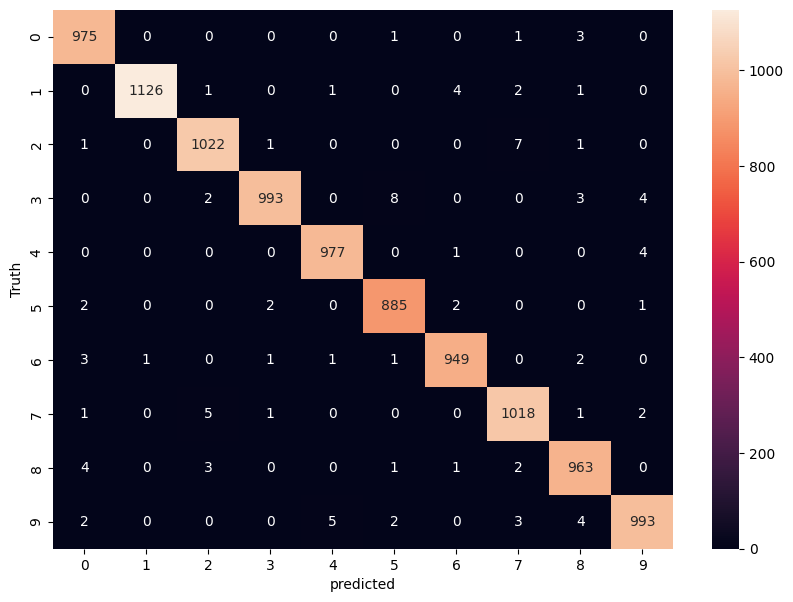

In [121]:
# visulaize the cm 
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm2,annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [122]:
# print the classification report ot see precision, recall and f1 as well
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y2_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Precision perfomance and f1_score of each digit classifier is close to each other in model 2. While digit 1 and 3 have the best recall in model1 This is slightly different from model 1 and distinguish precision from recall while precision is prediction-based and recall is truth-based, and hence, different model would probably learn different features from its own CNN architecture. However, recall would be more or less similar as these models are equally good and training from the same training sample.


In the third model, drop out layer is employed in the hope of reducing overfitting. The normal practice of adding dropout layer is after the maxpooling layer since the neurons might be biased when learning a prominent features, dropping out certain amount of neurons could prevent creating bias and without learning redundant details of the input

In [123]:
# model 3 with the use of drop out layer
from keras.layers import Dropout
model3=keras.models.Sequential([
    Conv2D(filters =16, kernel_size=(5,5),padding='same', input_shape=(28,28,1),activation='relu'),
    MaxPooling2D(pool_size=(2,2)), 
    Dropout(0.25),
    Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)), 
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax')
])
model3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model3.fit(x=X_train4D,
          y=y_trainOneHot,
          validation_split=0.2,
          epochs=5,batch_size=100)

Epoch 1/5
480/480 [==============================] - 5s 5ms/step - loss: 0.3148 - accuracy: 0.8985 - val_loss: 0.0771 - val_accuracy: 0.9777
Epoch 2/5
480/480 [==============================] - 2s 4ms/step - loss: 0.1044 - accuracy: 0.9671 - val_loss: 0.0602 - val_accuracy: 0.9832
Epoch 3/5
480/480 [==============================] - 2s 4ms/step - loss: 0.0805 - accuracy: 0.9736 - val_loss: 0.0471 - val_accuracy: 0.9867
Epoch 4/5
480/480 [==============================] - 2s 4ms/step - loss: 0.0652 - accuracy: 0.9797 - val_loss: 0.0412 - val_accuracy: 0.9882
Epoch 5/5
480/480 [==============================] - 3s 6ms/step - loss: 0.0561 - accuracy: 0.9819 - val_loss: 0.0384 - val_accuracy: 0.9882


We can see model 3 with dropout layer has lower accuracy from the previous model but the accuracy catch up in the later epochs. Also, using dropout layer in CNN usually would have better generalization on unseen input. So we might look forward on evaluating my custom dataset on model 3 that it would have better performance than the previous 2 model.

In [124]:
# Evaluation 
model3.evaluate(X_test4D, y_testOneHot)

313/313 [==============================] - 1s 4ms/step - loss: 0.0281 - accuracy: 0.9910


[0.02811076119542122, 0.9909999966621399]

In [125]:
y3_predicted=model3.predict(X_test4D)
y3_predicted_labels=[np.argmax(i) for i in y3_predicted]
cm3=tf.math.confusion_matrix(labels=y_test, predictions=y3_predicted_labels)
cm3

313/313 [==============================] - 1s 3ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    0,    0,    0,    1,    0,    1,    0,    0],
       [   0, 1128,    1,    2,    0,    0,    1,    2,    1,    0],
       [   1,    0, 1026,    1,    0,    0,    0,    4,    0,    0],
       [   0,    0,    0, 1005,    0,    2,    0,    1,    1,    1],
       [   0,    0,    0,    0,  970,    0,    1,    1,    0,   10],
       [   1,    0,    0,    6,    0,  884,    1,    0,    0,    0],
       [   4,    2,    0,    0,    1,    3,  947,    0,    1,    0],
       [   0,    1,    5,    3,    0,    0,    0, 1016,    1,    2],
       [   4,    0,    1,    1,    0,    2,    1,    2,  957,    6],
       [   3,    0,    0,    1,    2,    2,    0,    1,    1,  999]],
      dtype=int32)>

# Evaluation Part 2
### Evaluate the model above to see how well the model can generalise its prediction on my own custom handwritten digit

# Data source and Preprocessing from a custom dataset with my own handwriting

In [126]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Load the csv file
df= pd.read_csv('output3.csv', header=None)

# Define a dictionary that maps numerical labels to string labels
label_dict={
    1:'one',
    2:'two',
    3:'three',
    4:'four',
    5:'five',
    6:'six',
    7:'seven',
    8:'eight',
    9:'nine',
    0:'zero'
}

# Convert the categorical labels to one-hot labels
le=LabelEncoder()
y=le.fit_transform(df.iloc[:,-1])

In [127]:
y

array([6, 6, 6, 9, 9, 9, 5, 5, 5, 8, 8, 8, 4, 4, 4, 3, 3, 3, 0, 0, 0, 1,
       1, 1, 7, 7, 7, 2, 2, 2])

In [128]:
# Preprocess X 

# Split the data into features and labels
X=df.iloc[:,:-1]
X

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,195,195,195,196,196,196,197,197,205,178,...,199,198,198,197,197,197,199,199,199,199
1,195,194,194,194,194,195,196,197,195,186,...,210,209,209,208,208,208,209,209,209,209
2,189,189,190,190,191,192,193,193,192,192,...,207,207,207,207,207,207,206,206,206,206
3,180,180,181,181,182,183,184,184,180,186,...,205,205,205,205,205,205,204,204,204,204
4,175,175,176,176,177,178,179,179,177,181,...,207,207,207,207,207,207,207,207,207,207
5,181,181,182,182,183,184,185,185,190,178,...,203,222,200,183,216,210,208,208,208,208
6,188,188,188,189,189,189,190,190,193,187,...,198,198,198,198,198,198,199,199,199,198
7,196,196,196,197,197,198,198,198,187,207,...,201,200,200,199,198,198,200,199,198,197
8,188,188,189,189,190,191,192,192,191,189,...,201,202,202,203,203,203,203,203,203,203
9,190,190,190,191,191,191,192,192,195,193,...,207,207,207,207,207,207,207,207,207,207


In [129]:
X_4D=X.values.reshape(X.shape[0],28,28,1).astype('float32')
X_4D.shape

(30, 28, 28, 1)

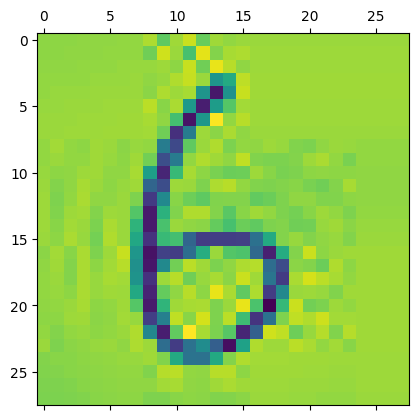

In [130]:
plt.matshow(X_4D[0])

In [131]:
# normalizing X
X_4D=X_4D/255

In [132]:
# OneHot Y
y_OneHot=to_categorical(y)

In [133]:
y_OneHot

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 

In [134]:
y_predicted_my=model.predict(X_4D)
y_predicted_my

1/1 [==============================] - 0s 17ms/step


array([[4.15613409e-03, 1.76047161e-03, 2.39391848e-02, 7.63736010e-01,
        1.58651848e-04, 9.00106505e-02, 1.61719862e-02, 3.97167896e-05,
        9.04560536e-02, 9.57108568e-03],
       [1.10265743e-02, 6.87452033e-03, 7.86684230e-02, 5.13871968e-01,
        5.37876913e-04, 1.72341034e-01, 4.27005216e-02, 1.65625053e-04,
        1.60947993e-01, 1.28654717e-02],
       [1.95658784e-02, 1.07112965e-02, 8.57742727e-02, 4.61388409e-01,
        2.01019295e-03, 2.75604606e-01, 3.20130996e-02, 5.06075565e-04,
        8.51810798e-02, 2.72450577e-02],
       [1.12702949e-02, 1.23115089e-02, 2.29109153e-01, 2.67469168e-01,
        1.27373938e-03, 6.40030280e-02, 2.61315163e-02, 3.19656916e-04,
        3.74195606e-01, 1.39163341e-02],
       [3.37090977e-02, 1.45623786e-02, 2.25626588e-01, 2.30559662e-01,
        2.47001043e-03, 1.01467498e-01, 7.48532712e-02, 4.23572405e-04,
        2.83815354e-01, 3.25125270e-02],
       [4.41178158e-02, 9.50423721e-03, 3.45170051e-01, 1.32539466e-01,
   

In [135]:
y_predicted_my_labels=[np.argmax(i) for i in y_predicted_my]

In [136]:
y_p=model.predict(X_4D)
y_p[0]

1/1 [==============================] - 0s 20ms/step


array([4.1561341e-03, 1.7604716e-03, 2.3939185e-02, 7.6373601e-01,
       1.5865185e-04, 9.0010650e-02, 1.6171986e-02, 3.9716790e-05,
       9.0456054e-02, 9.5710857e-03], dtype=float32)

In [137]:
y_OneHot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [138]:
model.evaluate(X_4D,y_OneHot)

1/1 [==============================] - 0s 26ms/step - loss: 3.3138 - accuracy: 0.2000


[3.313786029815674, 0.20000000298023224]

In [139]:
model2.evaluate(X_4D,y_OneHot)

1/1 [==============================] - 0s 26ms/step - loss: 8.5945 - accuracy: 0.1000


[8.594500541687012, 0.10000000149011612]

In [140]:
model3.evaluate(X_4D,y_OneHot)

1/1 [==============================] - 0s 25ms/step - loss: 5.2804 - accuracy: 0.1000


[5.280363082885742, 0.10000000149011612]

The training loss is still quite significant, but given my limited knowledge, I can not come up with a proper fix to reduce the loss as small as possible. Therefore, I just accessed the evaluation in terms of accuracy. Model 1 generate slightly better prediction performance with 0.2 on my handwritten digit while model 1 and 2 has similar accuracy of 0.10



In [141]:
y_p_labels=[np.argmax(i)for i in y_p]
y_p_labels[:5]

[3, 3, 3, 8, 8]

In [142]:
y

array([6, 6, 6, 9, 9, 9, 5, 5, 5, 8, 8, 8, 4, 4, 4, 3, 3, 3, 0, 0, 0, 1,
       1, 1, 7, 7, 7, 2, 2, 2])

In [143]:
cm_my=tf.math.confusion_matrix(labels=y, predictions=y_p_labels)
cm_my

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 2, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 2, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 0]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

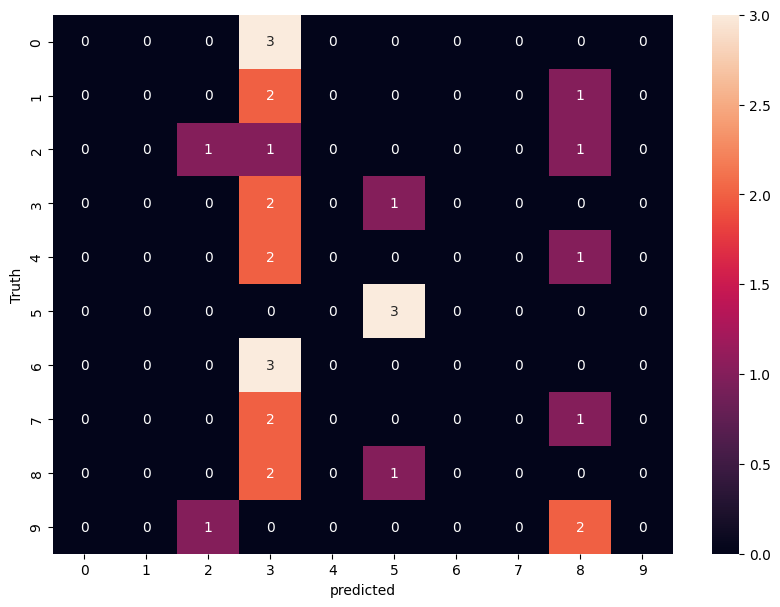

In [144]:
# visulaize the cm_my
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_my,annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [145]:
# print the classification report ot see precision, recall and f1 as well
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y, y_p_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.50      0.33      0.40         3
           3       0.12      0.67      0.20         3
           4       0.00      0.00      0.00         3
           5       0.60      1.00      0.75         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3

    accuracy                           0.20        30
   macro avg       0.12      0.20      0.14        30
weighted avg       0.12      0.20      0.13        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Evaluate on the rest of the models

In [146]:
# second model evaluation
y_p2=model2.predict(X_4D)
y_p2_labels=[np.argmax(i)for i in y_p2]

1/1 [==============================] - 0s 21ms/step


In [147]:
cm_my2=tf.math.confusion_matrix(labels=y, predictions=y_p2_labels)
cm_my2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

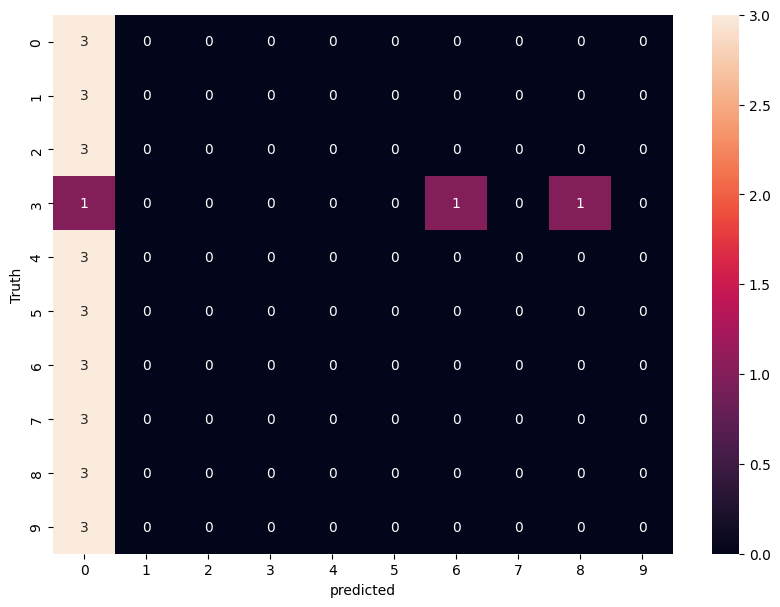

In [148]:
# visulaize the cm_my
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_my2,annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [149]:
# print the classification report ot see precision, recall and f1 as well
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y, y_p2_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.11      1.00      0.19         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3

    accuracy                           0.10        30
   macro avg       0.01      0.10      0.02        30
weighted avg       0.01      0.10      0.02        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The recall classification report on model2 aligns with the confusion matrix, since we learn from the confusion matrix that model2 would classify any seen record as digit 0.

In [150]:
# third model evaluation
y_p3=model3.predict(X_4D)
y_p3_labels=[np.argmax(i)for i in y_p3]

1/1 [==============================] - 0s 19ms/step


In [151]:
cm_my3=tf.math.confusion_matrix(labels=y, predictions=y_p3_labels)
cm_my3

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

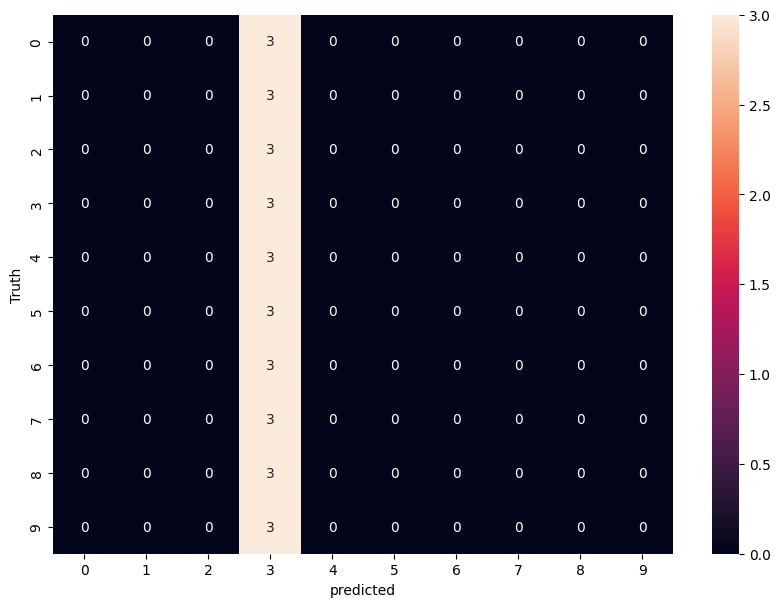

In [152]:
# visulaize the cm_my3
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_my3,annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

The confusion matrix above implies model 3 would classify all my handwritten digit as 3

In [153]:
# print the classification report ot see precision, recall and f1 as well
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y, y_p3_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.10      1.00      0.18         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3

    accuracy                           0.10        30
   macro avg       0.01      0.10      0.02        30
weighted avg       0.01      0.10      0.02        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Evaluation Part 3
### Append my custom dataset into the mnist set to see if training together could improve the accuracy on my custom datset




In [154]:
np.save('custom_X.npy',X_4D)
np.save('custom_y.npy',y_OneHot)
custom_X=np.load('custom_X.npy')
custom_y=np.load('custom_y.npy')

In [155]:
custom_X.shape

(30, 28, 28, 1)

In [156]:
custom_y.shape

(30, 10)

In [157]:
custom_y[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [158]:
# Append custom dataset into mnist
from sklearn.model_selection import train_test_split

(c_X_train,c_X_test,c_y_train,c_y_test)=train_test_split(custom_X, custom_y, test_size=0.2,random_state=42)

In [159]:
X_train_new=np.concatenate((X_train4D,c_X_train),axis=0)

In [160]:
X_train_new.shape

(60024, 28, 28, 1)

In [161]:
# Joining as new training set and testing set
X_test_new=np.concatenate((X_test4D,c_X_test),axis=0)
y_train_new=np.concatenate((y_trainOneHot,c_y_train),axis=0)
y_test_new=np.concatenate((y_testOneHot,c_y_test),axis=0)

In [162]:
model.fit(x=X_train_new,
          y=y_train_new,
          validation_split=0.2,
          epochs=5,batch_size=1000)

Epoch 1/5
49/49 [==============================] - 1s 23ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0405 - val_accuracy: 0.9892
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0092 - accuracy: 0.9975 - val_loss: 0.0407 - val_accuracy: 0.9890
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0079 - accuracy: 0.9979 - val_loss: 0.0413 - val_accuracy: 0.9898
Epoch 4/5
49/49 [==============================] - 1s 17ms/step - loss: 0.0071 - accuracy: 0.9982 - val_loss: 0.0421 - val_accuracy: 0.9895
Epoch 5/5
49/49 [==============================] - 1s 18ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.0427 - val_accuracy: 0.9898


In [163]:
model.evaluate(X_4D,y_OneHot) 

1/1 [==============================] - 0s 37ms/step - loss: 4.3140 - accuracy: 0.2000


[4.31402587890625, 0.20000000298023224]

After including my custom dataset into training, the accuracy of evalutaion on my custom dataset is lower. So given the size of my custom dataset, it is insignificant for the model to learn enough features, even though my hand written digits are included in the training.

In [165]:
model2.fit(x=X_train_new,
          y=y_train_new,
          validation_split=0.2,
          epochs=5,batch_size=1000)

Epoch 1/5
49/49 [==============================] - 1s 20ms/step - loss: 0.0082 - accuracy: 0.9984 - val_loss: 0.0508 - val_accuracy: 0.9883
Epoch 2/5
49/49 [==============================] - 1s 16ms/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.0502 - val_accuracy: 0.9883
Epoch 3/5
49/49 [==============================] - 1s 19ms/step - loss: 0.0047 - accuracy: 0.9994 - val_loss: 0.0500 - val_accuracy: 0.9886
Epoch 4/5
49/49 [==============================] - 1s 17ms/step - loss: 0.0043 - accuracy: 0.9996 - val_loss: 0.0503 - val_accuracy: 0.9888
Epoch 5/5
49/49 [==============================] - 1s 17ms/step - loss: 0.0041 - accuracy: 0.9996 - val_loss: 0.0505 - val_accuracy: 0.9885


In [166]:
model2.evaluate(X_4D,y_OneHot)  

1/1 [==============================] - 0s 28ms/step - loss: 8.8984 - accuracy: 0.1000


[8.898370742797852, 0.10000000149011612]

Same as model 1 evaluation above, the accuracy is not improving with model 2

In [167]:
# model 3 evaluation
model3.fit(x=X_train_new,
          y=y_train_new,
          validation_split=0.2,
          epochs=5,batch_size=100)

Epoch 1/5
481/481 [==============================] - 3s 6ms/step - loss: 0.0532 - accuracy: 0.9830 - val_loss: 0.0453 - val_accuracy: 0.9884
Epoch 2/5
481/481 [==============================] - 3s 6ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0448 - val_accuracy: 0.9875
Epoch 3/5
481/481 [==============================] - 3s 7ms/step - loss: 0.0419 - accuracy: 0.9862 - val_loss: 0.0392 - val_accuracy: 0.9883
Epoch 4/5
481/481 [==============================] - 3s 6ms/step - loss: 0.0379 - accuracy: 0.9868 - val_loss: 0.0396 - val_accuracy: 0.9896
Epoch 5/5
481/481 [==============================] - 2s 5ms/step - loss: 0.0371 - accuracy: 0.9878 - val_loss: 0.0371 - val_accuracy: 0.9893


In [168]:
model3.evaluate(X_4D,y_OneHot)

1/1 [==============================] - 0s 24ms/step - loss: 3.5885 - accuracy: 0.1000


[3.5885255336761475, 0.10000000149011612]

# Conclusion
In this report, I trained three CNN models with similar achitecture to see how they perform on MNIST dataset and evaluate the model performance with my handwritten digit. 

The three models share similar architecture. The small difference is that the first model uses ReLU as activation function in the hidden layers, while the second one uses tanh. The third model uses ReLU as activation function but dropout layers are added within the model architecture with the expectation to imporove any fitting problem. 

However, evaluation of the three models does not perform well on my custom dataset. It is probably due to the poor quality of picture taken and it is different from the digit dataset in the MNIST dataset. Hence the features learnt by the models failed to perform as well as in testing against its own testing set from the MNIST dataset.

After that, I tried to include my custom dataset into the training process of the three model. Surprisingly, the first model has a performance boost on evaluating on my custom dataset. Also, increasing the epoch size has improved the performance as well. Nevertheless, the improvement is not captured in model 2 and model 3, while I was expecting model 3 would have performed better with the dropout layer. Furthermore, my custom dataset size is so small for the model to learn features and generate accurate prediction.Given the time constraint and knowledge, I could not proceed to look into the reason model 3 has such a differentiation from theory. 

For further study in the CNN, the activation function at the last layer would be of interested to tune around. Since in this report, I use softmax in the fully connected layer and it is the most popular activation choice of the last layer due to the normalization of class probablity. 

Data augmentation shall be further explored as well. Since my custom dataset has different features such as thickness of the digit while the MNIST dataset has much thinker line. It exposed one of the disadvantage of the CNN, which is vulnerable to detecting thickness and rotation. In order to build a more robust model, more all-rounded understanding on deep learning concept and relevant hyperparameter in model building is required, such as optimize the training process by minimizing the loss as small as possible, which I fail to solve the issue in this report.